In [1]:
import matplotlib as m
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
import geopandas as gpd
import numpy as np
import copy
import json
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,9)
mpl.style.use('ggplot')

In [3]:
with open("../2_Concentration_Factors/total_output_sector.json",'r') as load_f: # ../2_Concentration_Factors/
    total_output = json.load(load_f)
Country = list(total_output.keys())

### [Exclusive economic zone](http://iilss.net/exclusive-economic-zoneeez-map-of-the-world/)
An exclusive economic zone extends from the baseline to a maximum of **200 nautical miles (370.4 km; 230.2 mi)**, thus it includes the contiguous zone. A coastal nation has control of all economic resources within its exclusive economic zone, including fishing, mining, oil exploration, and any pollution of those resources.

In [63]:
# df_shp = gpd.read_file('10m_cultural/ne_10m_admin_0_countries.shp')
df_shp1 = gpd.read_file('C:/Users/15311/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')
df_shp2 = gpd.read_file('C:/Users/15311/Desktop/Global_PM2.5/World_EEZ_v11_20191118/eez_v11.shp')

In [65]:
df_shp2 = df_shp2[df_shp2['POL_TYPE'] == '200NM']

<AxesSubplot:>

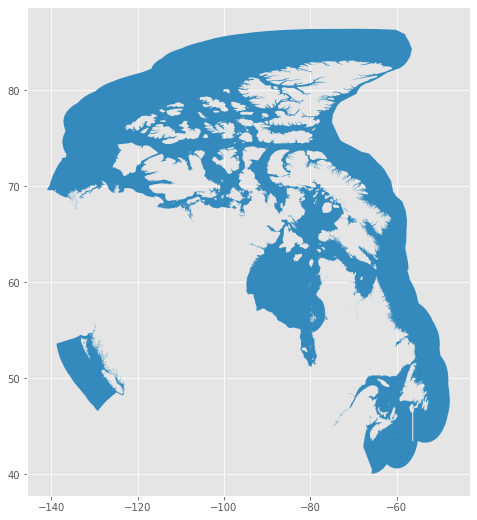

In [66]:
df_shp2[df_shp2['ISO_TER1'] == 'CAN'].plot()

<AxesSubplot:>

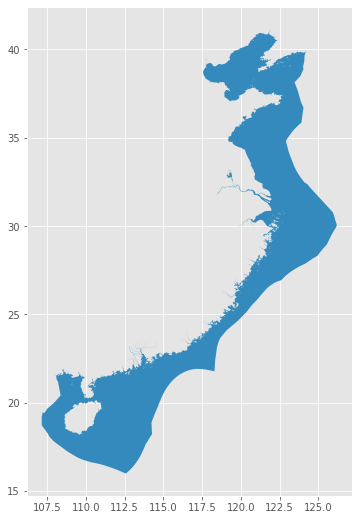

In [67]:
df_shp2[df_shp2['ISO_TER1'] == 'CHN'].plot()

<AxesSubplot:>

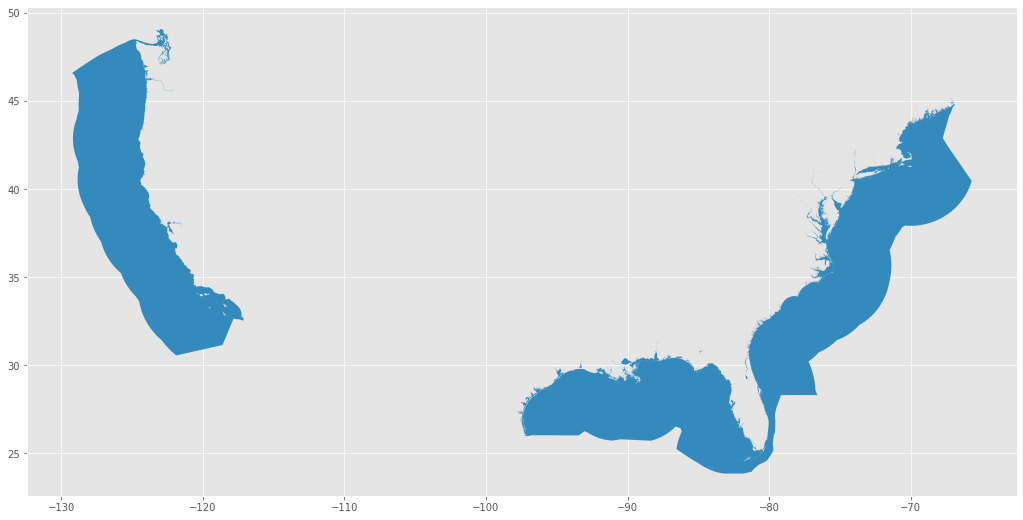

In [68]:
df_shp2[df_shp2['ISO_TER1'] == 'USA'].plot()

<AxesSubplot:>

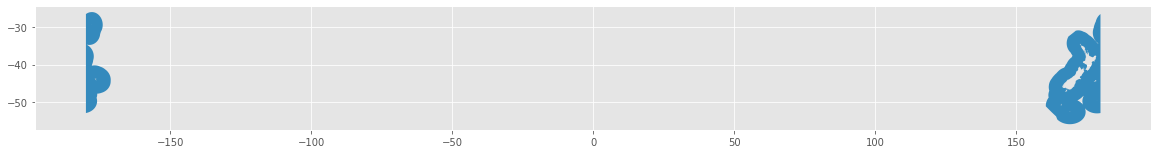

In [69]:
df_shp2[df_shp2['ISO_TER1'] == 'NZL'].plot()

In [194]:
not_in_df_shp2_ter = []
for i in Country:
    if i in list(df_shp2['ISO_TER1']):
        continue
    else:
        not_in_df_shp2_ter.append(i)
print(not_in_df_shp2_ter,len(not_in_df_shp2_ter))

['AFG', 'AND', 'ARM', 'AUT', 'BLR', 'BTN', 'BOL', 'BWA', 'BFA', 'BDI', 'CAF', 'TCD', 'CZE', 'ETH', 'HKG', 'HUN', 'KGZ', 'LAO', 'LSO', 'LIE', 'LUX', 'MAC', 'MWI', 'MLI', 'MNG', 'NPL', 'NER', 'PRY', 'MDA', 'RWA', 'SMR', 'SRB', 'SVK', 'SDS', 'SWZ', 'CHE', 'TJK', 'MKD', 'UGA', 'UKR', 'UZB', 'ZMB', 'ZWE', 'ROW'] 44


In [195]:
not_in_df_shp2_iso = []
for i in Country:
    if i in list(df_shp2['ISO_SOV1']):
        continue
    else:
        not_in_df_shp2_iso.append(i)
print(not_in_df_shp2_iso,len(not_in_df_shp2_iso))

['AFG', 'AND', 'ARM', 'ABW', 'AUT', 'BLR', 'BMU', 'BTN', 'BOL', 'BWA', 'VGB', 'BFA', 'BDI', 'CYM', 'CAF', 'TCD', 'CZE', 'ETH', 'PYF', 'GRL', 'HKG', 'HUN', 'KGZ', 'LAO', 'LSO', 'LIE', 'LUX', 'MAC', 'MWI', 'MLI', 'MNG', 'NPL', 'NCL', 'NER', 'PRY', 'MDA', 'RWA', 'SMR', 'SRB', 'SVK', 'SDS', 'SWZ', 'CHE', 'TJK', 'MKD', 'UGA', 'UKR', 'UZB', 'ZMB', 'ZWE', 'ROW'] 51


In [196]:
eez_country = []
for i in Country:
    if i in not_in_df_shp2_iso:
        continue
    else:
        eez_country.append(i)

In [198]:
len(eez_country)

137

In [204]:
for i in eez_country:
    if len(df_shp2[df_shp2['ISO_SOV1'] == i]) > 1:
        print(i,len(df_shp2[df_shp2['ISO_SOV1'] == i]))

AUS 6
BRA 2
CHL 3
COL 5
DNK 3
ECU 2
FRA 18
IND 2
NLD 7
NZL 4
NOR 3
PRT 3
ZAF 2
ESP 2
GBR 13
USA 13


In [203]:
for i in eez_country:
    if len(df_shp2[df_shp2['ISO_TER1'] == i]) > 1:
        print(i,len(df_shp2[df_shp2['ISO_TER1'] == i]))

CHL 2


In [207]:
df_shp2[df_shp2['ISO_SOV1'] == 'CHL']

,MRGID,GEONAME,MRGID_TER1,POL_TYPE,MRGID_SOV1,TERRITORY1,ISO_TER1,SOVEREIGN1,MRGID_TER2,MRGID_SOV2,...,ISO_SOV3,UN_SOV1,UN_SOV2,UN_SOV3,UN_TER1,UN_TER2,UN_TER3,geometry,6,22
10,8465.0,Chilean Exclusive Economic Zone,2165.0,200NM,2165.0,Chile,CHL,Chile,0.0,0.0,...,None,152,NaN,NaN,152.0,NaN,NaN,"POLYGON ((-70.93199 -54.75580, -70.92427 -54.7...",None,None
17,22756.0,Chilean Exclusive Economic Zone (San Felix and...,25135.0,200NM,2165.0,Islas San Félix and San Ambrosio,CHL,Chile,0.0,0.0,...,None,152,NaN,NaN,152.0,NaN,NaN,"POLYGON ((-76.15513 -26.28253, -76.15475 -26.2...",None,None
18,21787.0,Chilean Exclusive Economic Zone (Easter Island),15120.0,200NM,2165.0,Easter Island,None,Chile,0.0,0.0,...,None,152,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-105.20748 -23.12633, -105.20586 -23...",None,None


In [83]:
['ABW', 'BMU', 'VGB', 'CYM', 'PYF', 'GRL', 'NCL']

,MRGID,GEONAME,MRGID_TER1,POL_TYPE,MRGID_SOV1,TERRITORY1,ISO_TER1,SOVEREIGN1,MRGID_TER2,MRGID_SOV2,...,ISO_SOV1,ISO_SOV2,ISO_SOV3,UN_SOV1,UN_SOV2,UN_SOV3,UN_TER1,UN_TER2,UN_TER3,geometry
279,8402.0,Bermudian Exclusive Economic Zone,8636.0,200NM,2208.0,Bermuda,BMU,United Kingdom,0.0,0.0,...,GBR,None,None,826,NaN,NaN,60.0,NaN,NaN,"POLYGON ((-60.70499 32.39114, -60.70499 32.390..."


## Countries that are not in EEZ map (has no EEZ)
'AFG': Afghanistan <br>
'AND': Andorra <br>
'ARM': Armenia <br>
'AUT': Austria <br>
'BLR': Belarus <br>
'BTN': Bhutan <br>
'BOL': Bolivia <br>
'BWA': Botswana <br>
'BFA': Burkina Faso <br>
'BDI': Burundi <br>
'CAF': Central African Republic <br>
'TCD': Chad <br>
'CZE': Czech Republic <br>
'ETH': Ethiopia <br>
**'HKG': HongKong** <br>
'HUN': Hungary <br>
'KGZ': Kyrgyzstan <br>
'LAO': Laos <br>
'LSO': Lesotho <br>
'LIE': Liechtenstein <br>
'LUX': Luxembourg <br>
'MAC': Macao <br>
'MWI': Malawi <br>
'MLI': Mali <br>
'MNG': Mongolia <br>
'NPL': Nepal <br>
'NER': Niger <br>
'PRY': Paraguay <br>
'MDA': Moldova <br>
'RWA': Rwanda <br>
'SMR': San Marino <br>
'SRB': Uzbekistan <br>
'SVK': Slovakia <br>
'SDS': South Sudan <br>
**'SUD': Sudan** is 'SDN' in the dataset<br> 
'SWZ': Eswatini <br>
'CHE': Switzerland <br>
'TJK': Tajikistan <br>
'MKD': North Macedonia <br>
'UGA': Uganda <br>
'UKR': Ukraine <br>
'UZB': Uzbekistan <br>
'ZMB': Zambia <br>
'ZWE': Zimbabwe

In [21]:
# Change 'PSX' to 'PSE' and change 'SDN' to 'SUD'
df_shp1.loc[11,'ADM0_A3'] = 'PSE'
df_shp1.loc[86,'ADM0_A3'] = 'SUD'

In [193]:
# change 'SDN' to 'SUD'
df_shp2.loc[169,'ISO_TER1'] = 'SUD'
df_shp2.loc[169,'ISO_SOV1'] = 'SUD'

C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [22]:
fraction = pd.read_csv('C:/Users/15311/Desktop/country_classify.csv')
fraction = gpd.GeoDataFrame(fraction)

In [23]:
wholeworldB = gpd.read_file('C:/Users/15311/Desktop/output_wholeworld/wholeworld_bio.shp')
wholeworldB = gpd.GeoDataFrame(wholeworldB)

In [24]:
fraction['new_area_fraction'] = [{} for i in range(len(fraction))]

## Check the length of each fraction

In [ ]:
for index in tqdm(range(len(fraction))):
    length = len(json.loads(fraction.iloc[index]['area_fraction'].replace('\'','\"')).keys()) 
    if length > 2: 
        print(index,json.loads(fraction.iloc[index]['area_fraction'].replace('\'','\"')))

## If part of a grid cell is in a country (or countries), allocate all of the deaths to that country(s) proportinally.

In [231]:
trail = {'RUS': 0.1, 'USA': 0.2, 'ROW': 0.7}
new_trail = {}
key_list = list(trail.keys())
key_list.remove('ROW')
for key in key_list:
    new_trail[key] = trail[key] + trail[key]/(1-trail['ROW']) * trail['ROW']
new_trail

{'RUS': 0.3333333333333333, 'USA': 0.6666666666666666}

In [29]:
trail = {'RUS': 0.1, 'USA': 0.2, 'MEX': 0.1,'ROW': 0.6}
new_trail = {}
key_list = list(trail.keys())
key_list.remove('ROW')
for key in key_list:
    new_trail[key] = trail[key] + trail[key]/(1-trail['ROW']) * trail['ROW']
new_trail

{'RUS': 0.25, 'USA': 0.5, 'MEX': 0.25}

In [30]:
trail = {'MEX': 0.1,'ROW': 0.9}
new_trail = {}
key_list = list(trail.keys())
key_list.remove('ROW')
for key in key_list:
    new_trail[key] = trail[key] + trail[key]/(1-trail['ROW']) * trail['ROW']
new_trail

{'MEX': 1.0000000000000002}

## If the grid cell is not part of a country, just allocate the deaths to the nearest country if its distance to that contry is within its Exclusive economic zone

In [ ]:
df_shp2[df_shp2['ISO_TER1'] == 'USA'].crs

In [ ]:
s = gpd.GeoSeries(wholeworldB.iloc[404].geometry).set_crs(4326)
s.plot()

In [ ]:
s1 = df_shp2[df_shp2['ISO_TER1'] == 'USA']
s1.plot()

In [ ]:
# s1 = df_shp2[df_shp2['ISO_TER1'] == 'USA'].to_crs(20349)
# s1.plot()

In [ ]:
df_shp2[df_shp2['ISO_TER1'] == 'USA'].intersection(wholeworldB.iloc[265].geometry).area.values[0]

In [147]:
fraction.iloc[268]

Unnamed: 0                                                         268
AllCause                                                             0
BasePM25                                                        2.5007
NH3                                                        7.41137e-05
NOx                                                          0.0435723
PNH4                                                       9.24347e-05
PNO3                                                         0.0084224
PSO4                                                       6.46058e-05
SOA                                                           0.111948
SOx                                                         1.4629e-14
TotalPM25                                                     0.138245
TotalPop                                                       15.3256
TotalPopD                                                            0
geometry             POLYGON ((-157.65625 21.25, -157.5 21.25, -157...
area_f

In [71]:
import time
for i in tqdm(Country):
    if i not in list(df_shp2['ISO_SOV1']):
        continue
    else:
        start = time.time()
        area = df_shp2[df_shp2['ISO_SOV1'] == i].intersection(wholeworldB.iloc[265].geometry).area.values[0]
        end = time.time()
        print(i,area,'time is:',end-start)

  0%|                                                                                          | 0/188 [00:00<?, ?it/s]C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
  4%|███                                                                               | 7/188 [00:00<00:04, 44.41it/s]

ALB 0.0 time is: 0.018947362899780273
DZA 0.0 time is: 0.02197408676147461
AGO 0.0 time is: 0.02393627166748047
ATG 0.0 time is: 0.015932321548461914
ARG 0.0 time is: 0.07482242584228516
ABW 0.0 time is: 0.013928890228271484


  7%|██████                                                                           | 14/188 [00:02<00:29,  5.93it/s]

AUS 0.0 time is: 1.798229694366455
AZE 0.0 time is: 0.01599574089050293
BHS 0.0 time is: 0.1326453685760498
BHR 0.0 time is: 0.013962745666503906


  9%|██████▉                                                                          | 16/188 [00:02<00:24,  7.10it/s]

BGD 0.0 time is: 0.09474945068359375
BRB 0.0 time is: 0.010967254638671875
BEL 0.0 time is: 0.013963937759399414
BLZ 0.0 time is: 0.02796626091003418
BEN 0.0 time is: 0.011958599090576172
BMU 0.0 time is: 0.016954660415649414
BIH 0.0 time is: 0.010937213897705078


 14%|███████████▏                                                                     | 26/188 [00:02<00:12, 12.47it/s]

BRA 0.0 time is: 0.3690476417541504
VGB 0.0 time is: 0.01891613006591797
BRN 0.0 time is: 0.015004873275756836
BGR 0.0 time is: 0.012967348098754883
KHM 0.0 time is: 0.016941070556640625
CMR 0.0 time is: 0.023903369903564453


 18%|██████████████▋                                                                  | 34/188 [03:10<25:26,  9.91s/it]

CAN 0.0 time is: 187.7410056591034
CPV 0.0 time is: 0.024970054626464844
CYM 0.0 time is: 0.010972738265991211


 21%|████████████████▊                                                                | 39/188 [03:15<18:35,  7.49s/it]

CHL 0.0 time is: 5.144238710403442


 22%|█████████████████▋                                                               | 41/188 [03:16<15:57,  6.51s/it]

CHN 0.0 time is: 0.4298520088195801
COL 0.0 time is: 0.049866437911987305
COG 0.0 time is: 0.016954421997070312
CRI 0.0 time is: 0.021976470947265625
HRV 0.0 time is: 0.05588412284851074


 27%|█████████████████████▉                                                           | 51/188 [03:16<06:46,  2.97s/it]

CUB 0.0 time is: 0.20947623252868652
CYP 0.0 time is: 0.015944242477416992
CIV 0.0 time is: 0.024937868118286133
PRK 0.0 time is: 0.035903215408325195
COD 0.0 time is: 0.013962507247924805
DNK 0.0 time is: 0.04288601875305176
DJI 0.0 time is: 0.01595592498779297
DOM 0.0 time is: 0.014963388442993164
ECU 0.0 time is: 0.024934768676757812


 30%|████████████████████████▌                                                        | 57/188 [03:16<04:14,  1.94s/it]

EGY 0.0 time is: 0.0278928279876709
SLV 0.0 time is: 0.011966943740844727
ERI 0.0 time is: 0.02891683578491211
EST 0.0 time is: 0.03291511535644531
FJI 0.0 time is: 0.03589987754821777


 33%|██████████████████████████▋                                                      | 62/188 [03:27<04:07,  1.97s/it]

FIN 0.0 time is: 10.735292673110962
FRA 0.0 time is: 0.10774469375610352


 35%|████████████████████████████                                                     | 65/188 [03:42<05:35,  2.72s/it]

PYF 0.0 time is: 14.610706806182861
GAB 0.0 time is: 0.044878482818603516
GMB 0.0 time is: 0.015958547592163086
GEO 0.0 time is: 0.01994776725769043
DEU 0.0 time is: 0.0388948917388916
GHA 0.0 time is: 0.018949508666992188


 37%|█████████████████████████████▋                                                   | 69/188 [03:42<03:41,  1.86s/it]

GRC 0.0 time is: 0.34507250785827637


 38%|██████████████████████████████▌                                                  | 71/188 [03:47<03:45,  1.93s/it]

GRL 0.0 time is: 4.410238027572632
GTM 0.0 time is: 0.012969017028808594
GIN 0.0 time is: 0.03389692306518555
GUY 0.0 time is: 0.013996124267578125
HTI 0.0 time is: 0.01695537567138672
HND 0.0 time is: 0.02294182777404785


 41%|█████████████████████████████████▌                                               | 78/188 [03:47<01:50,  1.00s/it]

ISL 0.0 time is: 0.16954398155212402
IND 0.0 time is: 0.15959978103637695


 43%|██████████████████████████████████▍                                              | 80/188 [03:59<03:20,  1.86s/it]

IDN 0.0 time is: 12.094651222229004
IRN 0.0 time is: 0.039893150329589844
IRQ 0.0 time is: 0.01595759391784668
IRL

 44%|███████████████████████████████████▊                                             | 83/188 [03:59<02:25,  1.39s/it]

 0.0 time is: 0.14860272407531738
ISR 0.0 time is: 0.015989303588867188


 45%|████████████████████████████████████▌                                            | 85/188 [04:00<01:56,  1.13s/it]

ITA 0.0 time is: 0.19843769073486328
JAM 0.0 time is: 0.04388308525085449


 46%|█████████████████████████████████████▍                                           | 87/188 [04:01<01:38,  1.02it/s]

JPN 0.0 time is: 0.8158261775970459
JOR 0.0 time is: 0.029911041259765625


 51%|████████████████████████████████████████▉                                        | 95/188 [04:01<00:36,  2.56it/s]

KAZ 0.0 time is: 0.20644378662109375
KEN 0.0 time is: 0.030916929244995117
KWT 0.0 time is: 0.032911062240600586
LVA 0.0 time is: 0.01795220375061035
LBN 0.0 time is: 0.03590083122253418
LBR 0.0 time is: 0.035902976989746094
LBY

 55%|███████████████████████████████████████████▊                                    | 103/188 [04:01<00:18,  4.68it/s]

 0.0 time is: 0.031914472579956055
LTU 0.0 time is: 0.025934219360351562
MDG 0.0 time is: 0.1545853614807129


 56%|█████████████████████████████████████████████                                   | 106/188 [04:01<00:15,  5.19it/s]

MYS 0.0 time is: 0.23237991333007812
MDV 0.0 time is: 0.09973311424255371
MLT 0.0 time is: 0.012965202331542969
MRT 0.0 time is: 0.01695561408996582


 59%|██████████████████████████████████████████████▊                                 | 110/188 [04:02<00:11,  6.74it/s]

MUS 0.0 time is: 0.10970783233642578


 62%|█████████████████████████████████████████████████▎                              | 116/188 [04:02<00:07,  9.31it/s]

MEX 0.0 time is: 0.22140789031982422
MCO 0.0 time is: 0.010968446731567383
MNE 0.0 time is: 0.0139617919921875
MAR 0.0 time is: 0.023969411849975586
MOZ 0.0 time is: 0.0637967586517334


 63%|██████████████████████████████████████████████████▋                             | 119/188 [04:02<00:06, 10.21it/s]

MMR 0.0 time is: 0.19544219970703125
NAM 0.0 time is: 0.015956878662109375
NLD 0.0 time is: 0.02190876007080078


 64%|███████████████████████████████████████████████████▍                            | 121/188 [04:07<00:40,  1.67it/s]

NCL 0.0 time is: 5.154247045516968


 65%|████████████████████████████████████████████████████▎                           | 123/188 [04:08<00:32,  2.00it/s]

NZL 0.0 time is: 0.30016207695007324
NIC 0.0 time is: 0.023936986923217773
NGA 0.0 time is: 0.07982397079467773


 69%|███████████████████████████████████████████████████████▎                        | 130/188 [04:25<01:20,  1.38s/it]

NOR 0.0 time is: 17.251378536224365
PSE 0.0 time is: 0.013962030410766602
OMN 0.0 time is: 0.02194070816040039
PAK 0.0 time is: 0.04091930389404297
PAN 0.0 time is: 0.08779215812683105


 70%|████████████████████████████████████████████████████████▏                       | 132/188 [04:25<01:02,  1.11s/it]

PNG 0.0 time is: 0.20548558235168457
PER 0.0 time is: 0.02393198013305664


 71%|█████████████████████████████████████████████████████████                       | 134/188 [04:27<00:53,  1.01it/s]

PHL 0.0 time is: 1.1608953475952148
POL 0.0 time is: 0.018982410430908203
PRT 0.0 time is: 0.018949031829833984
QAT 0.0 time is: 0.013930320739746094


 73%|██████████████████████████████████████████████████████████▋                     | 138/188 [04:27<00:30,  1.61it/s]

KOR 0.0 time is: 0.22041058540344238
ROU 0.0 time is: 0.016954421997070312


 78%|██████████████████████████████████████████████████████████████▌                 | 147/188 [05:29<02:27,  3.60s/it]

RUS 0.0 time is: 62.36025619506836
WSM 0.0 time is: 0.014992952346801758
STP 0.0 time is: 0.010977029800415039
SAU 0.0 time is: 0.05185842514038086
SEN 0.0 time is: 0.03191018104553223
SYC 0.0 time is: 0.01994609832763672
SLE 0.0 time is: 0.019947528839111328
SGP 0.0 time is: 0.017950057983398438
SVN

 85%|███████████████████████████████████████████████████████████████████▋            | 159/188 [05:30<00:42,  1.45s/it]

 0.0 time is: 0.010938167572021484
SOM 0.0 time is: 0.01998138427734375
ZAF 0.0 time is: 0.026892662048339844
ESP 0.0 time is: 0.06682109832763672
LKA 0.0 time is: 0.040891408920288086
SUR 0.0 time is: 0.016986846923828125


 89%|███████████████████████████████████████████████████████████████████████         | 167/188 [05:31<00:17,  1.21it/s]

SWE 0.0 time is: 0.8387241363525391
SYR 0.0 time is: 0.01495981216430664
TWN 0.0 time is: 0.020943641662597656
THA 0.0 time is: 0.07483315467834473
TGO 0.0 time is: 0.012964487075805664
TTO 0.0 time is: 0.012001514434814453
TUN 0.0 time is: 0.01695394515991211
TUR 0.0 time is: 0.04886913299560547


 92%|█████████████████████████████████████████████████████████████████████████▌      | 173/188 [05:31<00:07,  1.90it/s]

TKM 0.0 time is: 0.01795649528503418
ARE 0.0 time is: 0.03989291191101074


 94%|███████████████████████████████████████████████████████████████████████████▎    | 177/188 [05:31<00:04,  2.41it/s]

GBR 0.0 time is: 0.3610677719116211
TZA 0.0 time is: 0.03487849235534668


 96%|████████████████████████████████████████████████████████████████████████████▌   | 180/188 [05:34<00:04,  1.83it/s]

USA 0.0 time is: 3.0099523067474365
URY 0.0 time is: 0.018949031829833984
VUT 0.0 time is: 0.0249326229095459
VEN 0.0 time is: 0.06881594657897949


100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [05:34<00:00,  1.78s/it]

VNM 0.0 time is: 0.15262532234191895
YEM 0.0 time is: 0.026871204376220703


In [14]:
import time
for i in tqdm(Country):
    if i not in list(df_shp2['ISO_TER1']):
        continue
    else:
        start = time.time()
        area = df_shp2[df_shp2['ISO_TER1'] == i].intersection(wholeworldB.iloc[265].geometry).area.values[0]
        end = time.time()
        print(i,area,'time is:',end-start)

1666156237.409826

<AxesSubplot:>

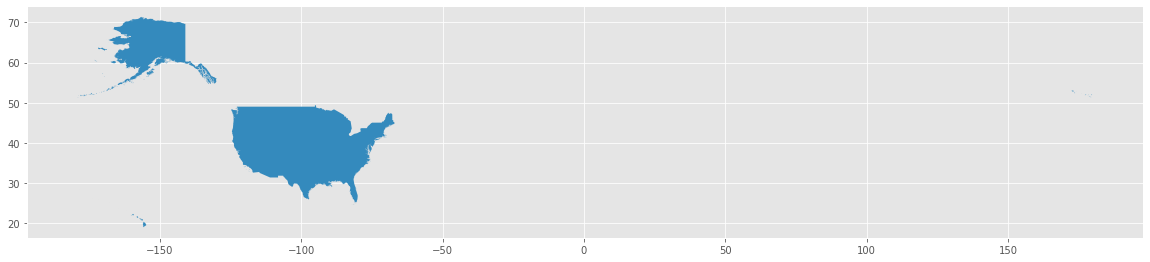

In [56]:
df_shp1[df_shp1['ADM0_A3'] == 'USA'].plot()

<AxesSubplot:>

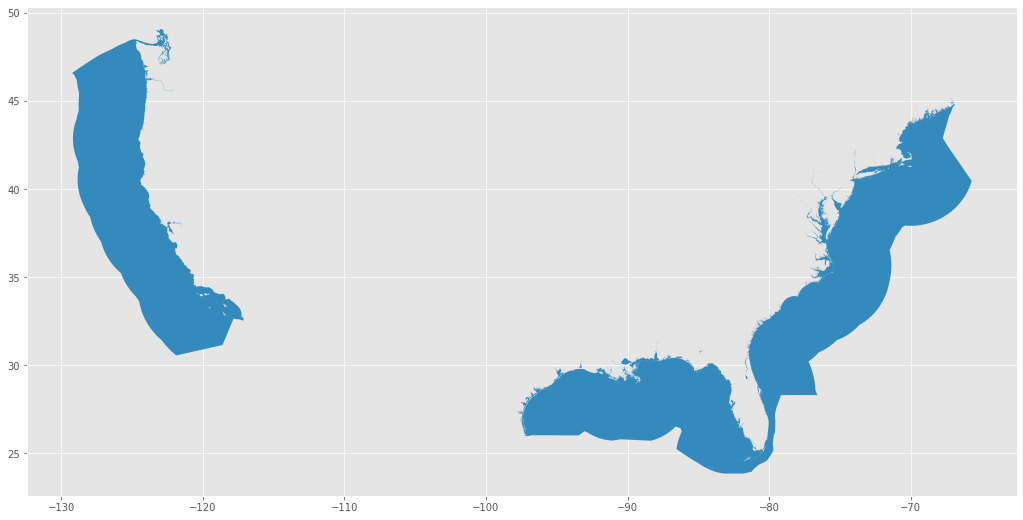

In [95]:
df_shp2[df_shp2['ISO_TER1'] == 'USA'].plot()

In [142]:
from shapely.geometry import Polygon
poly = gpd.GeoSeries([Polygon(((-126.8125,45), (-126.5,45), (-126.5,45.25), (-126.8125,45.25),(-126.8125,45)))])

<AxesSubplot:>

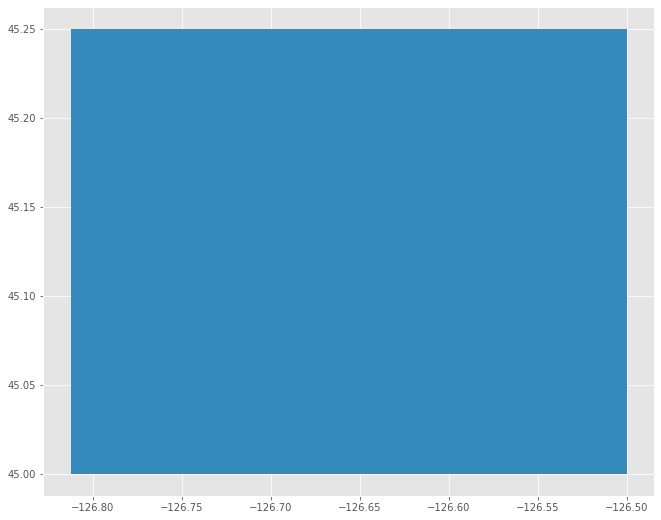

In [143]:
poly.plot()

In [166]:
fraction[2180:2200]

,Unnamed: 0,AllCause,BasePM25,NH3,NOx,PNH4,PNO3,PSO4,SOA,SOx,TotalPM25,TotalPop,TotalPopD,geometry,area_fraction,new_area_fraction
2180,2180,0.0,3.103272,0.007903,0.304117,0.001879,0.014674,0.009646,0.078257,2.668074e-04,0.967644,12514.697586,0.0,"POLYGON ((-118.90625 34, -118.75 34, -118.75 3...","{'USA': 0.8001195317273961, 'ROW': 0.199880468...",{}
2181,2181,0.0,3.103272,0.011228,0.390750,0.002670,0.018854,0.012629,0.105879,6.370780e-04,1.433434,85955.241384,0.0,"POLYGON ((-118.90625 34.25, -118.75 34.25, -11...",{'USA': 1.0},{}
2182,2182,0.0,3.103272,0.010521,0.380176,0.002502,0.018343,0.011533,0.115144,5.473212e-04,1.364181,4760.363040,0.0,"POLYGON ((-118.90625 34.375, -118.75 34.375, -...",{'USA': 1.0},{}
2183,2183,0.0,2.858666,0.009579,0.254586,0.001376,0.026733,0.009762,0.091246,1.845976e-04,1.443079,118.378444,0.0,"POLYGON ((-118.90625 35, -118.75 35, -118.75 3...",{'USA': 1.0},{}
2184,2184,0.0,2.858666,0.009861,0.247227,0.001417,0.025960,0.010041,0.080686,2.237892e-04,1.553100,9005.032811,0.0,"POLYGON ((-118.90625 35.25, -118.75 35.25, -11...",{'USA': 1.0},{}
2185,2185,0.0,2.858666,0.010090,0.260946,0.001450,0.027401,0.010179,0.083324,3.493711e-04,1.461727,8889.158428,0.0,"POLYGON ((-118.90625 35.375, -118.75 35.375, -...",{'USA': 1.0},{}
2186,2186,0.0,3.103272,0.010716,0.443276,0.002548,0.021388,0.012739,0.123711,4.012163e-04,1.398618,41764.610238,0.0,"POLYGON ((-118.828125 34.125, -118.75 34.125, ...",{'USA': 1.0},{}
2187,2187,0.0,3.103272,0.011664,0.457820,0.002774,0.022090,0.013550,0.127391,5.290196e-04,1.531173,24128.059542,0.0,"POLYGON ((-118.828125 34.1875, -118.75 34.1875...",{'USA': 1.0},{}
2188,2188,0.0,2.858666,0.009635,0.257189,0.001384,0.027006,0.009927,0.094003,1.859210e-04,1.659309,652.054689,0.0,"POLYGON ((-118.828125 35.125, -118.75 35.125, ...",{'USA': 1.0},{}
2189,2189,0.0,2.858666,0.009720,0.253866,0.001396,0.026657,0.010005,0.090265,1.958540e-04,1.681994,5042.894123,0.0,"POLYGON ((-118.828125 35.1875, -118.75 35.1875...",{'USA': 1.0},{}


In [210]:
fraction.iloc[2191]

Unnamed: 0                                                        2191
AllCause                                                             0
BasePM25                                                       3.34166
NH3                                                        0.000948228
NOx                                                            0.06247
PNH4                                                        0.00108063
PNO3                                                         0.0204007
PSO4                                                        0.00200702
SOA                                                           0.106264
SOx                                                        4.09892e-06
TotalPM25                                                     0.435025
TotalPop                                                             0
TotalPopD                                                            0
geometry             POLYGON ((-120 30, -117.5 30, -117.5 32, -120 ...
area_f

In [167]:
df_shp2[df_shp2['ISO_TER1'] == 'USA'].intersection(wholeworldB.iloc[2191]['geometry']).area.values

C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


array([1.5822717])

In [217]:
sum(df_shp2[df_shp2['ISO_SOV1'] == 'USA'].intersection(wholeworldB.iloc[i]['geometry']).area.values)==0

C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


True

In [216]:
for i in range(1760,1800):
    print(df_shp2[df_shp2['ISO_SOV1'] == 'USA'].intersection(wholeworldB.iloc[i]['geometry']).area.values,
         sum(df_shp2[df_shp2['ISO_SOV1'] == 'USA'].intersection(wholeworldB.iloc[i]['geometry']).area.values))

C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.3125] 0.3125
[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.3075422] 0.3075421961

KeyboardInterrupt: 

In [162]:
for i in range(1760,1800):
    print(df_shp2[df_shp2['ISO_TER1'] == 'USA'].intersection(wholeworldB.iloc[i]['geometry']).area.values)

C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.3125]
[0.3075422]
[0.01970534]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.0083489]
[0.00442263]
[0.]
[0.]
[0.05762655]
[0.]
[0.]
[0.]


In [36]:
print(wholeworldB.iloc[265]['geometry'])

POLYGON ((-157.8125 21, -157.5 21, -157.5 21.25, -157.8125 21.25, -157.8125 21))


In [ ]:
for index in tqdm(range(len(fraction))):
        if 'ROW' not in json.loads(fraction.iloc[index]['area_fraction'].replace('\'','\"')).keys():
#             conitinue
            fraction.loc[index,'ROW']= 0
        else:
#             print(fraction['area_fraction'][index]['ROW'])
            fraction.loc[index,'ROW'] = json.loads(fraction.iloc[index]['area_fraction'].replace('\'','\"'))['ROW']

In [ ]:
wholeworldB = gpd.read_file('C:/Users/15311/Desktop/output_wholeworld/wholeworld_bio.shp')
wholeworldB = gpd.GeoDataFrame(wholeworldB)

In [ ]:
fig, ax = plt.subplots(1, 1)
wholeworldB.plot(linewidths=0,column='SOA',ax=ax, vmin=0,vmax=1,legend=True,cmap = 'Reds',missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
plt.title('Excess mortality rates due to production \n (Unit: Number of deaths per 100000 populations)',fontsize=24)
ax.axis('off')

In [ ]:
wholeworldB['ROW'] = fraction['ROW']

In [ ]:
wholeworldB

In [ ]:
fig, ax = plt.subplots(1, 1)
wholeworldB.plot(linewidths=0,column='ROW',ax=ax, vmin=0,vmax=1,legend=True,cmap = 'Reds',missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
plt.title('ROW in the map',fontsize=24)
ax.axis('off')

In [225]:
count = 0
interupt_list = []
for i in tqdm(range(len(fraction))):
    area_fraction = json.loads(fraction.iloc[i]['area_fraction'].replace('\'','\"'))
    if area_fraction == {'ROW':1}:
        count += 1
    if count == 300:
        interupt_list.append(i)
        count = 0

100%|████████████████████████████████████████████████████████████████████████| 273739/273739 [01:05<00:00, 4169.23it/s]


In [228]:
print(interupt_list)

[492, 3701, 15619, 23120, 30440, 34481, 48423, 56209, 56754, 59230, 65249, 71692, 81576, 89934, 97227, 111472, 125049, 133654, 139379, 148958, 166903, 186187, 201926, 216988, 237885, 249322, 255311, 258770, 261622, 266090, 271279, 273363]


In [ ]:
[0, 492, 3701, 15619, 23120, 30440, 34481, 48423, 56209, 56754, 59230, 65249, 71692, 81576, 89934, 97227, 111472, 125049, 133654, 139379, 148958, 166903, 186187, 201926, 216988, 237885, 249322, 255311, 258770, 261622, 266090, 271279, 273363,273739]

In [230]:
len(fraction)

273739